In [1]:
import os
# print(os.getcwd())
os.chdir("..")
print(os.getcwd())

/home/b/b382397/AQUA/diagnostics/global_ocean


In [43]:
%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
import global_ocean_func as fn
from aqua.util import load_yaml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
yearly_data = reader.retrieve()[["ocpt","so"]].resample(time="Y").mean()

yearly_data=yearly_data.rename({"nz1":"lev"})
# yearly_data=yearly_data.rename({"ocpt":"ocpt"})
# data=data[["ocpt","so"]]

# yearly_data=data.resample(time="Y").mean()
yearly_data

<xarray.Dataset>
Dimensions:  (time: 5, lev: 69, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    ocpt     (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>
    so       (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>

In [4]:
config = load_yaml("config.yaml")
outputfig= config["outputfig"]


In [5]:
global_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Global Ocean")
atlantic_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Atlantic Ocean")
pacific_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Pacific Ocean")
indian_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Indian Ocean")
arctic_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Arctic Ocean")
southern_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Southern Ocean")


2023-07-06 09:55:31,049 - INFO - Seleced this region 90.0S : -90.0N, 0.0 : 360.0
2023-07-06 09:55:31,093 - INFO - Seleced this region 65.0S : -35.0N, -80.0 : 30.0
2023-07-06 09:55:31,127 - INFO - Seleced this region 65.0S : -55.0N, 120.0 : 290.0
2023-07-06 09:55:31,160 - INFO - Seleced this region 30.0S : -30.0N, 100.0 : 300.0
2023-07-06 09:55:31,195 - INFO - Seleced this region 90.0S : 65.0N, 0.0 : 360.0
2023-07-06 09:55:31,235 - INFO - Seleced this region -55.0S : -80.0N, -180.0 : 180.0


In [41]:
data1 = yearly_data.assign_coords(lon=(((yearly_data["lon"] + 180) % 360) - 180))
data1 = data1.roll(lon=int(len(data1['lon']) / 2), roll_coords=True)
data1
yearly_data.sel(lat=slice(-10,10))

<xarray.Dataset>
Dimensions:  (time: 5, lev: 69, lat: 20, lon: 360)
Coordinates:
  * lat      (lat) float64 -9.5 -8.5 -7.5 -6.5 -5.5 -4.5 ... 5.5 6.5 7.5 8.5 9.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    ocpt     (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 20, 360), meta=np.ndarray>
    so       (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 20, 360), meta=np.ndarray>

In [42]:
# yearly_data.sel(lon=slice(-30,-20)).so[1]
fn.std_anom_wrt_initial(yearly_data, False, -10, 15, -10, 150)


# fn.std_anom_wrt_initial(yearly_data, False,latS= -90,latN= 90,lonW= 0,lonE= 20)

2023-07-06 11:32:44,615 - INFO - Seleced this region 15S : -10N, 150 : None


<xarray.Dataset>
Dimensions:  (time: 5, lev: 69, lat: 0, lon: 210)
Coordinates:
  * lat      (lat) float64 
  * lon      (lon) float64 150.0 151.0 152.0 153.0 ... 356.0 357.0 358.0 359.0
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    ocpt     (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 0, 210), meta=np.ndarray>
    so       (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 0, 210), meta=np.ndarray>


<xarray.Dataset>
Dimensions:  (lev: 69, time: 5)
Coordinates:
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    ocpt     (time, lev) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>
    so       (time, lev) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>

In [18]:
# fn.std_anom_wrt_initial(yearly_data,False,"Global Ocean",latN =90,
#                         latS= -90,lonW = 0,lonE= 30)

fn.std_anom_wrt_initial(yearly_data, False, "Global Ocean", -90, 90, -20, -30)


2023-07-05 18:01:49,560 - INFO - Seleced this region -90S : 90N, -20 : -30


<xarray.Dataset>
Dimensions:  (lev: 69, time: 5)
Coordinates:
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    ocpt     (time, lev) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>
    so       (time, lev) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>

2023-07-03 00:03:18,431 - INFO - ./figs/TS_anomalies_global_ocean.png saved
2023-07-03 00:03:34,529 - INFO - ./figs/TS_anomalies_atlantic_ocean.png saved
2023-07-03 00:03:51,227 - INFO - ./figs/TS_anomalies_pacific_ocean.png saved
2023-07-03 00:04:07,794 - INFO - ./figs/TS_anomalies_indian_ocean.png saved
2023-07-03 00:04:24,454 - INFO - ./figs/TS_anomalies_arctic_ocean.png saved
2023-07-03 00:04:40,623 - INFO - ./figs/TS_anomalies_southern_ocean.png saved


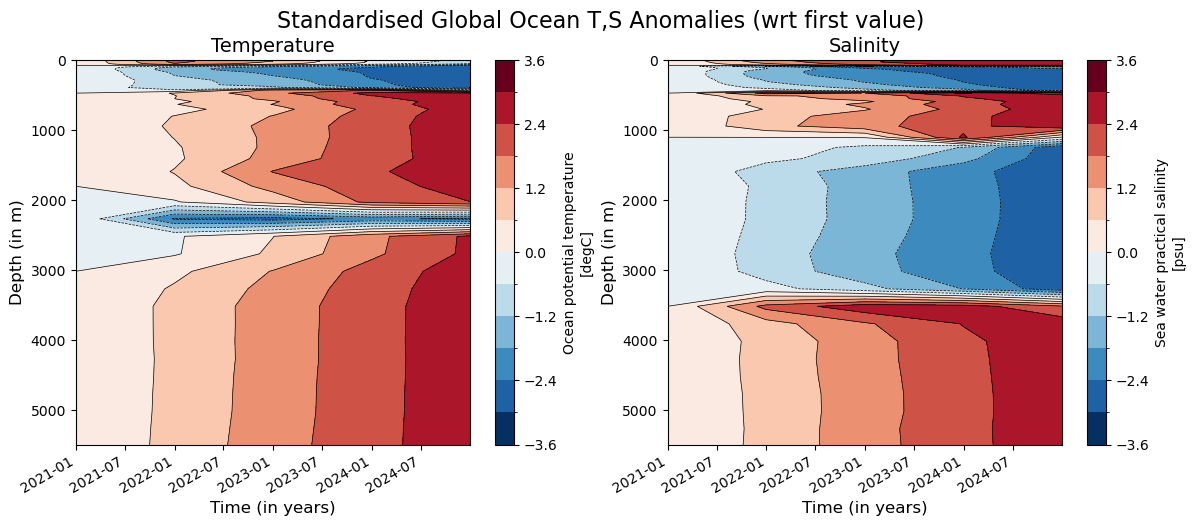

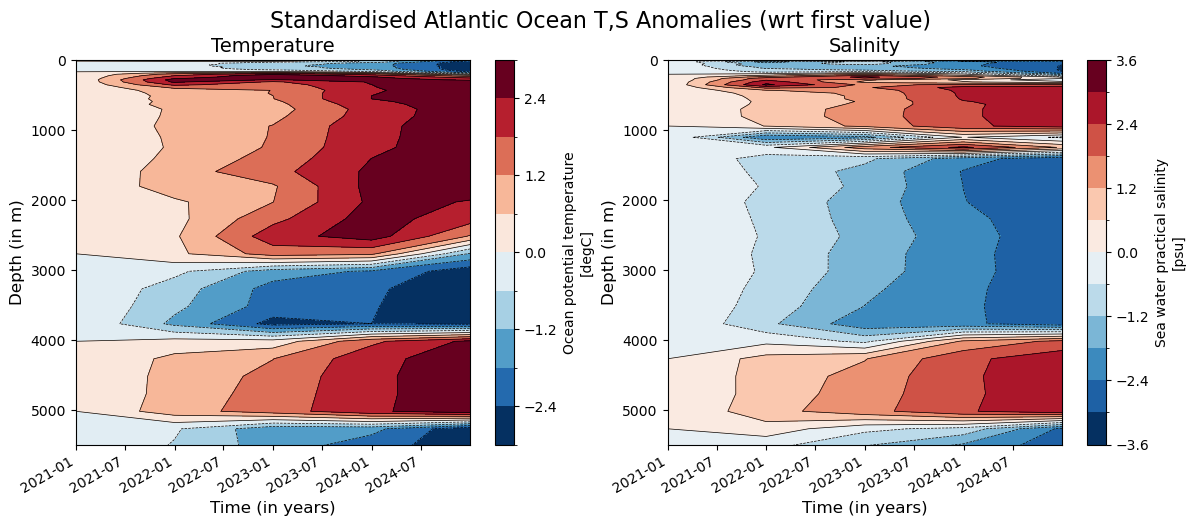

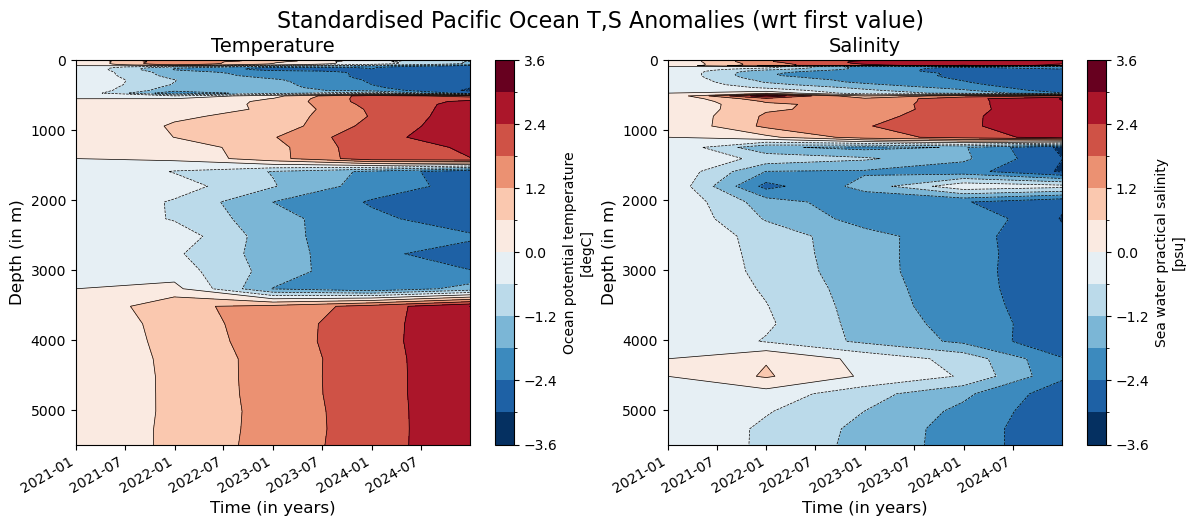

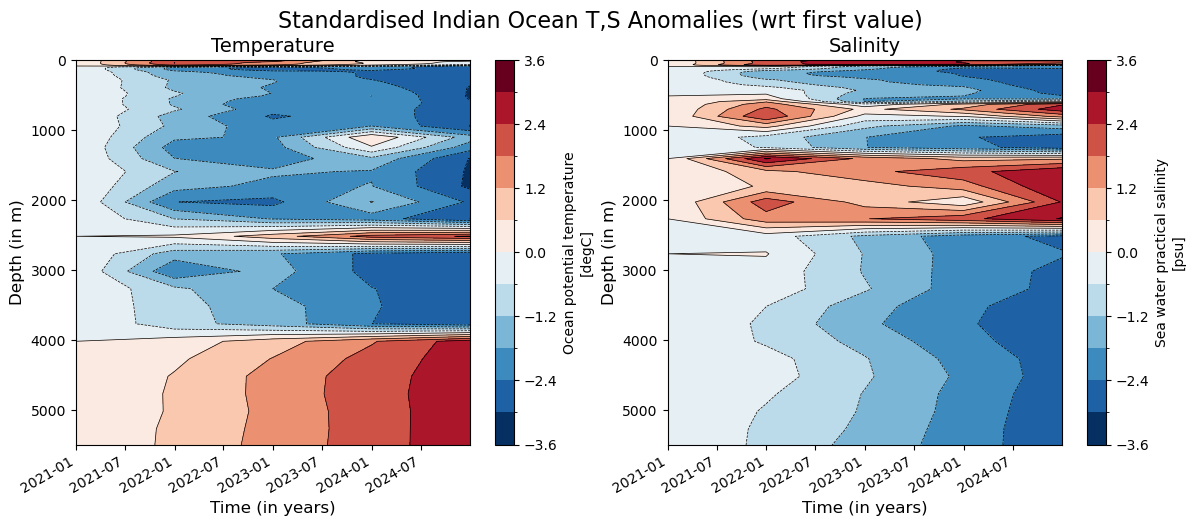

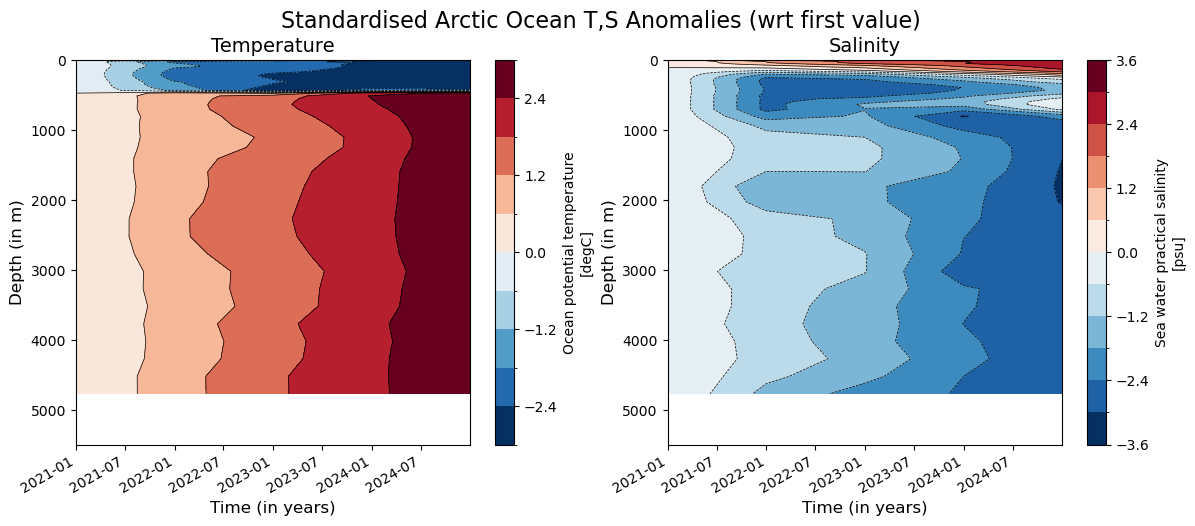

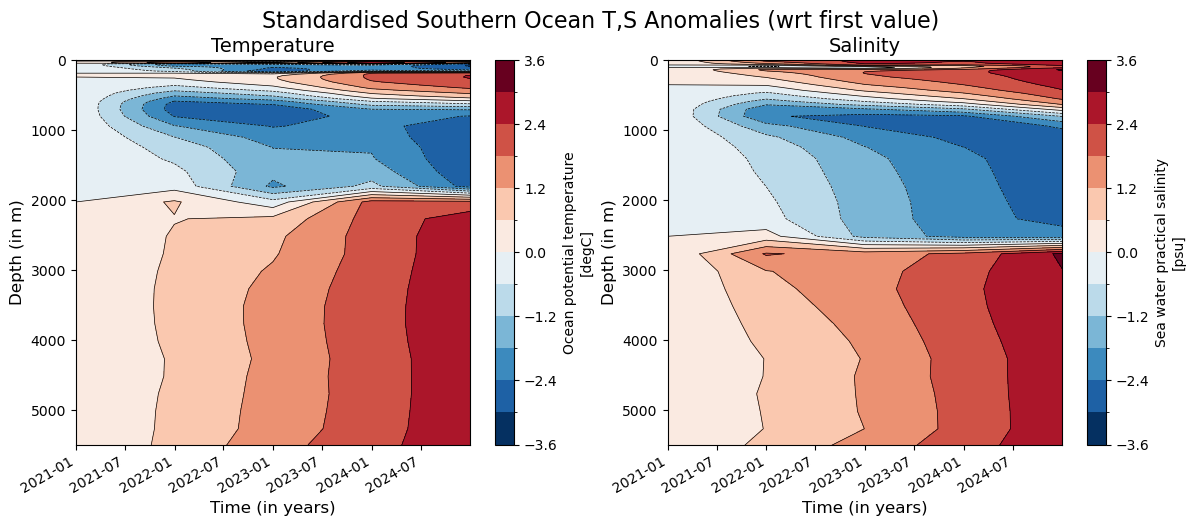

In [11]:
fn.ocpt_so_anom_plot(global_mean_anom,"Global Ocean", outputfig)
fn.ocpt_so_anom_plot(atlantic_mean_anom,"Atlantic Ocean", outputfig)
fn.ocpt_so_anom_plot(pacific_mean_anom,"Pacific Ocean", outputfig)
fn.ocpt_so_anom_plot(indian_mean_anom,"Indian Ocean", outputfig)
fn.ocpt_so_anom_plot(arctic_mean_anom,"Arctic Ocean", outputfig)
fn.ocpt_so_anom_plot(southern_mean_anom,"Southern Ocean", outputfig)

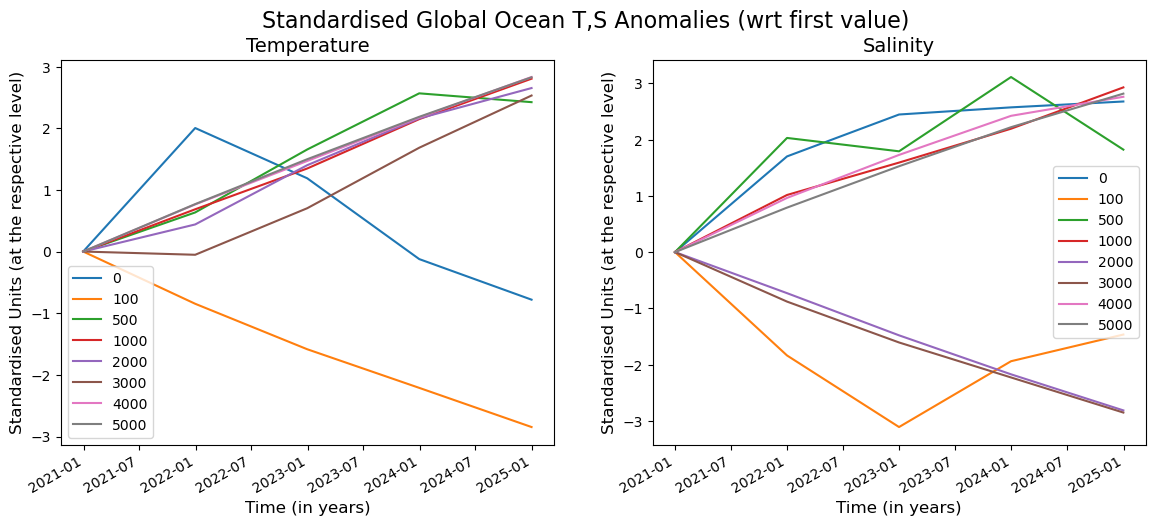

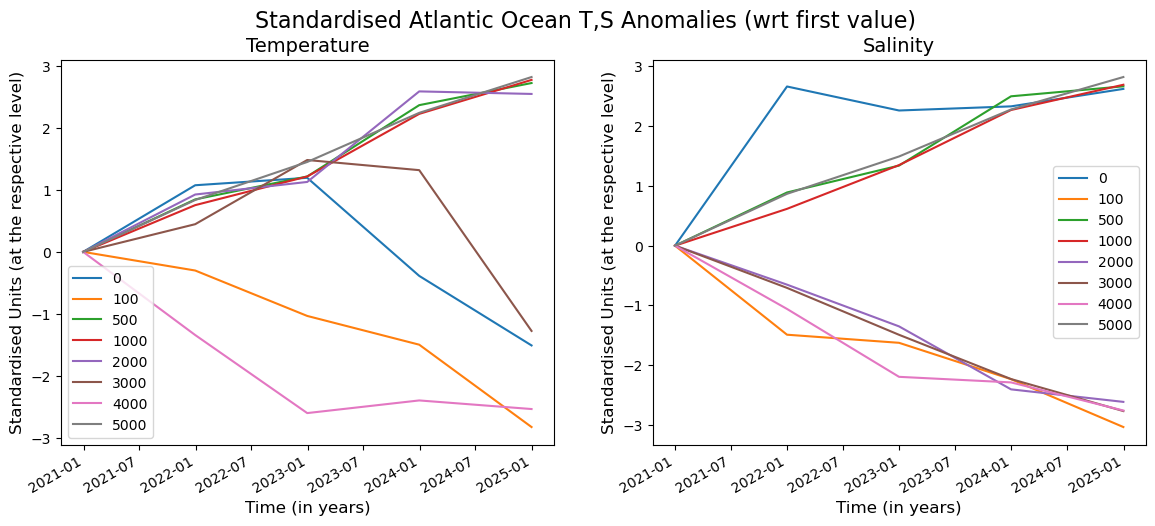

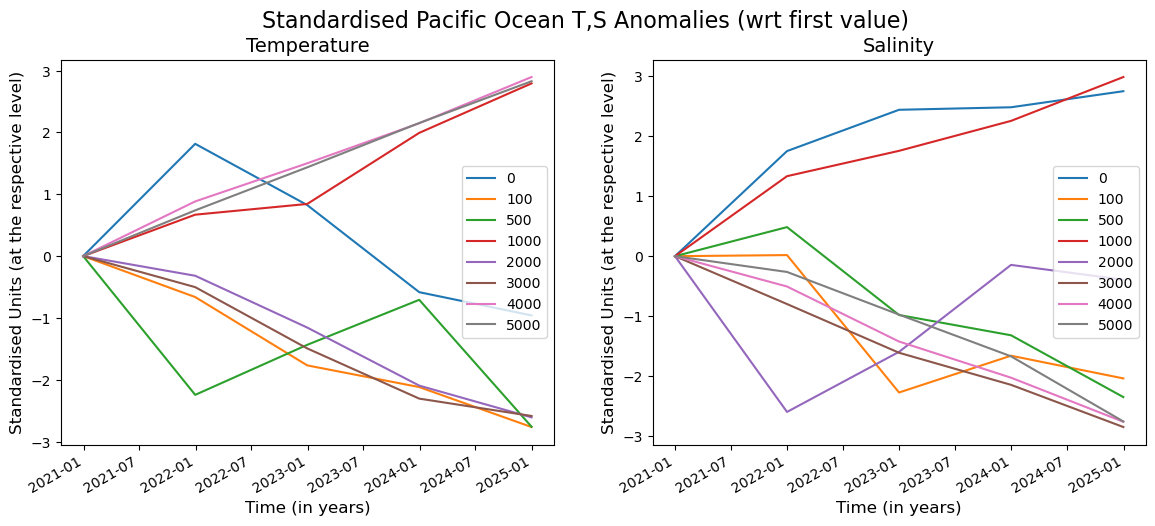

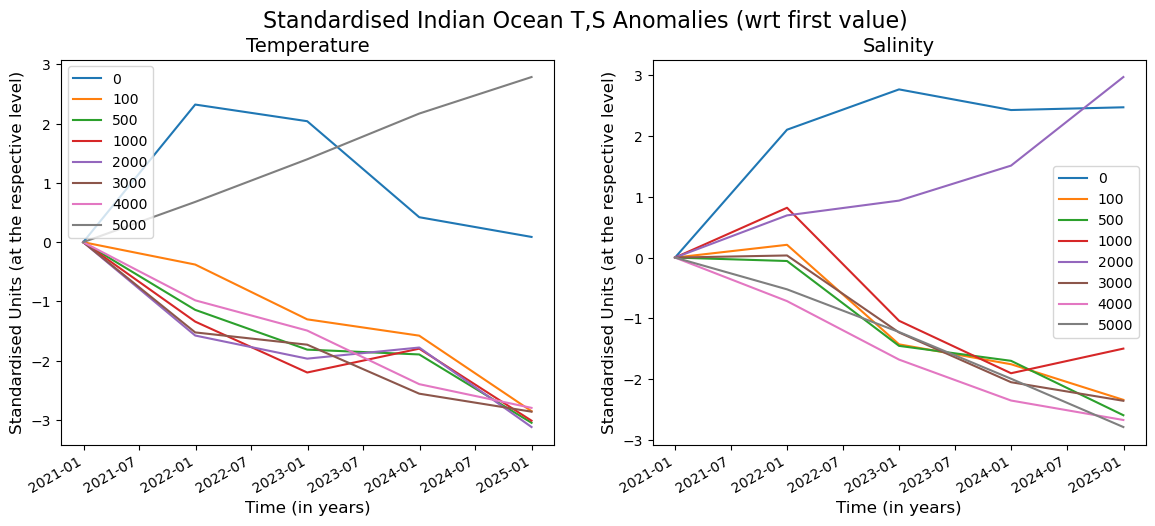

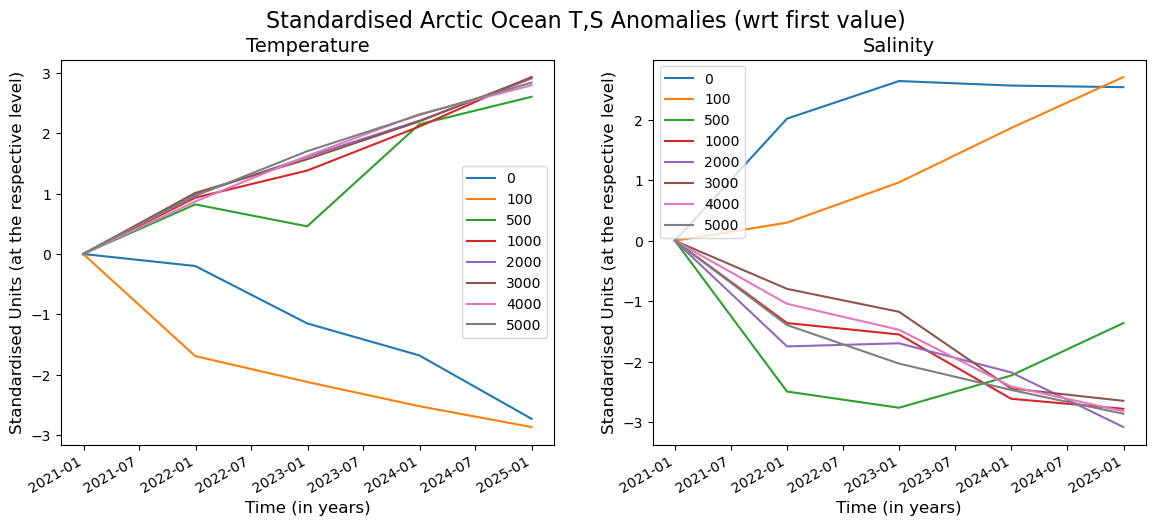

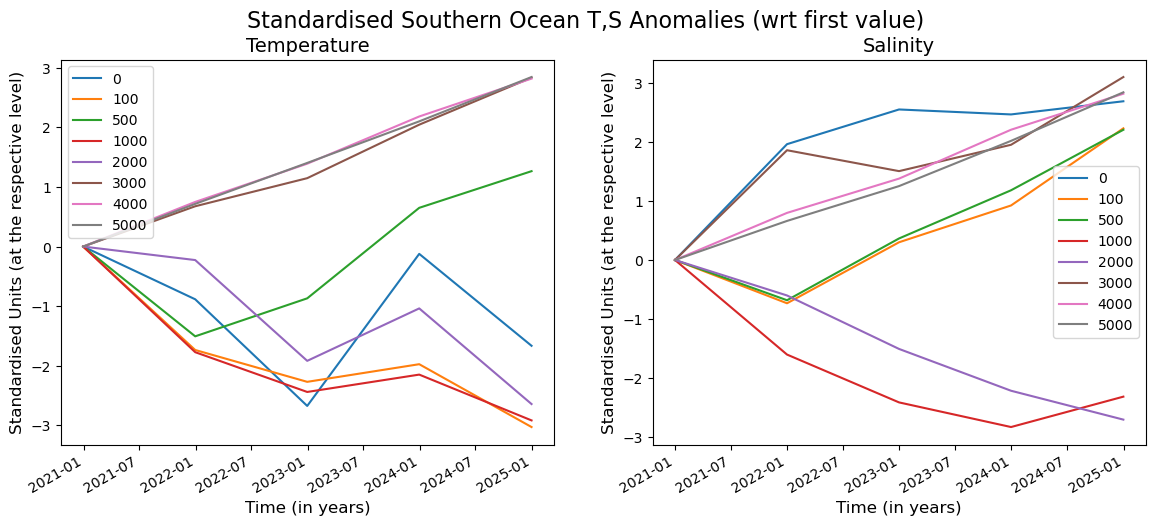

In [8]:
fn.time_series(global_mean_anom,'Global Ocean',customise_level=False, levels=list, outputfig)
fn.time_series(atlantic_mean_anom,'Atlantic Ocean', outputfig)
fn.time_series(pacific_mean_anom,'Pacific Ocean', outputfig)
fn.time_series(indian_mean_anom,'Indian Ocean', outputfig)
fn.time_series(arctic_mean_anom,'Arctic Ocean', outputfig)
fn.time_series(southern_mean_anom,'Southern Ocean', outputfig)